In [9]:
options(scipen=999)


In [10]:
data_kernel = read.csv('kernel_time.csv')

In [17]:
data_kernel['blocksize']=data_kernel['blocksize']*data_kernel['blocksize']

In [26]:
data_kernel['imagesize']=data_kernel['imagesize']*data_kernel['imagesize']

In [27]:
data_kernel

FLOPS_kernel,BYTES_kernel,Kernel.time,imagesize,blocksize
15104486,4539716,300,65536,64
60963808,18575684,563,262144,64
245433008,73971976,1776,1048576,64
926885888,289379552,7468,4194304,64
2261574400,661418656,44103,9437184,64
4583325696,1800351360,56821,26214400,64
4943773696,3209166848,158718,58982400,64
15104486,2985540,297,65536,256
60963808,12162372,820,262144,256
245433008,49089028,2719,1048576,256


In [20]:
FLOPS_kernel=data_kernel$FLOPS_kernel
BYTES_kernel=data_kernel$BYTES_kernel
Kernel.time=data_kernel$Kernel.time
blocksize=data_kernel$blocksize

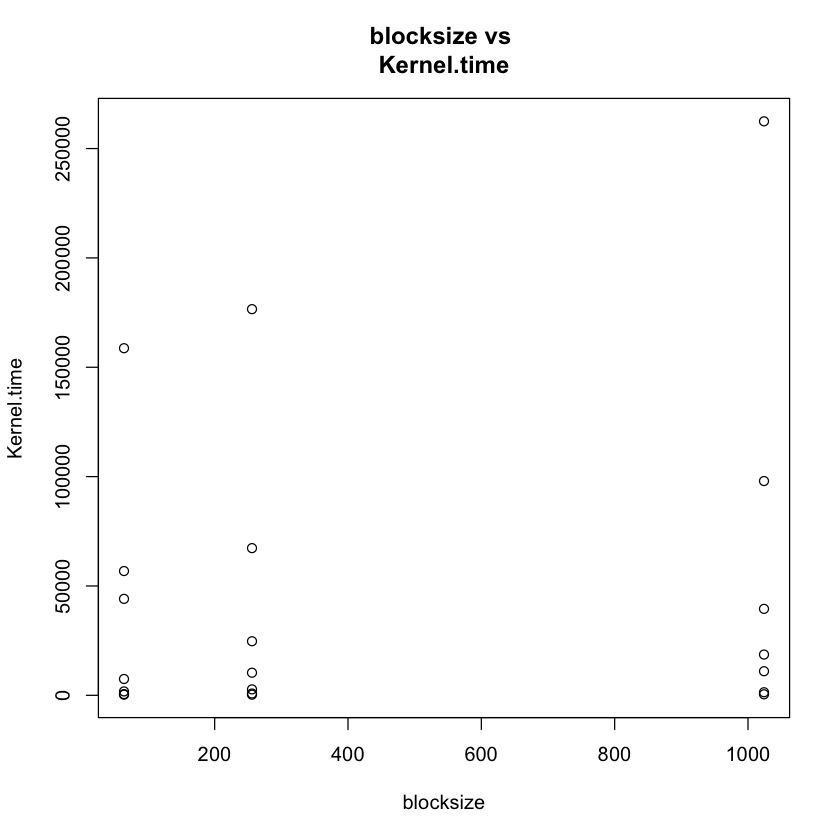

In [21]:
plot(blocksize, Kernel.time, xlab = "blocksize", ylab = "Kernel.time", main = 'blocksize vs 
Kernel.time')

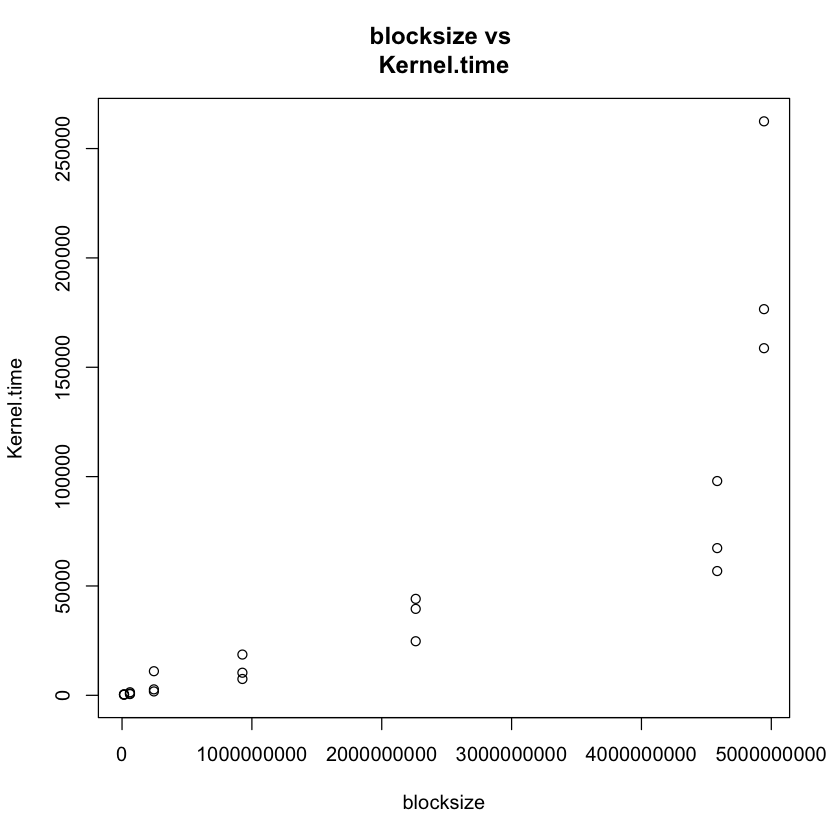

In [22]:
plot(FLOPS_kernel, Kernel.time, xlab = "blocksize", ylab = "Kernel.time", main = 'blocksize vs 
Kernel.time')

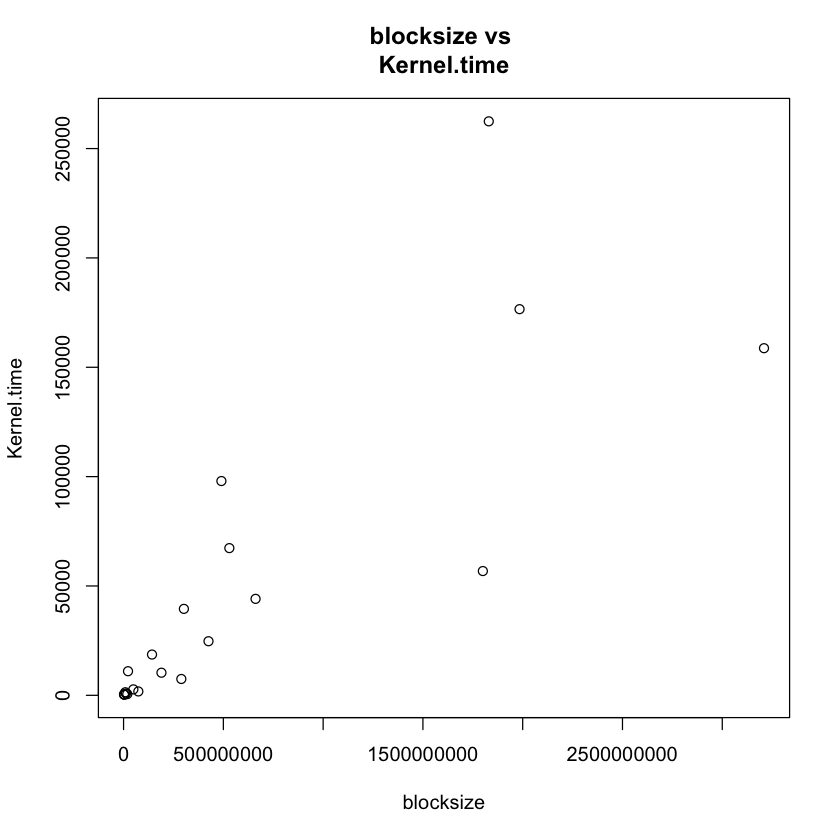

In [23]:
plot(BYTES_kernel, Kernel.time, xlab = "blocksize", ylab = "Kernel.time", main = 'blocksize vs 
Kernel.time')

In [28]:
lmfit = lm(Kernel.time~BYTES_kernel+FLOPS_kernel+blocksize)
summary(lmfit)


Call:
lm(formula = Kernel.time ~ BYTES_kernel + FLOPS_kernel + blocksize)

Residuals:
   Min     1Q Median     3Q    Max 
-66315 -18646   1315  12497  93630 

Coefficients:
                     Estimate       Std. Error t value Pr(>|t|)  
(Intercept)  -22996.576997398  12733.361375750  -1.806   0.0887 .
BYTES_kernel      0.000042797      0.000015612   2.741   0.0139 *
FLOPS_kernel      0.000014503      0.000006649   2.181   0.0435 *
blocksize        40.819234136     18.390685366   2.220   0.0403 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33210 on 17 degrees of freedom
Multiple R-squared:  0.8148,	Adjusted R-squared:  0.7822 
F-statistic: 24.94 on 3 and 17 DF,  p-value: 0.000001864


kernel_time=-22996.576997398+BYTES_kernel*0.000042797+FLOPS_kernel*0.000014503+blocksize*40.81923